## Business Understanding

        - To develop a machine learning model which is capable of classifying that a business goes bankrupt from the given different features.
        - Deploy the model on Flask.


        - Dataset Details 
                industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
                management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
                financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
                credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
                competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
                operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
                class: bankruptcy, non-bankruptcy (target variable).


## Data Understanding

        Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

        Importing Dataset

In [2]:
df = pd.read_csv('bankruptcy-prevention.csv',sep=';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


        Displaying first few rows


In [3]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
new_column_names = ['industrial_risk', 'management_risk', 'financial_flexibility','credibility','competitiveness','operating_risk','class']
df.columns = new_column_names

        Summary Statistics

In [5]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


        Summary Statistics for all the columns including categorical

In [6]:
df.describe(include='all')

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


        Verifying data Quality

                Checking if null values present in any column


In [7]:
df.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

        There is no missing values in our dataset

                Checking for number of duplicate rows

In [8]:
df.duplicated().sum()

147

        Displaying the duplicated rows present

In [9]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


        Checking for duplicate columns


In [10]:
df.T.duplicated()

industrial_risk          False
management_risk          False
financial_flexibility    False
credibility              False
competitiveness          False
operating_risk           False
class                    False
dtype: bool

        Checking datatype of each columns 


In [11]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

        Basic Information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


        Value counts for class column

In [14]:
df['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

        Correlation Analysis

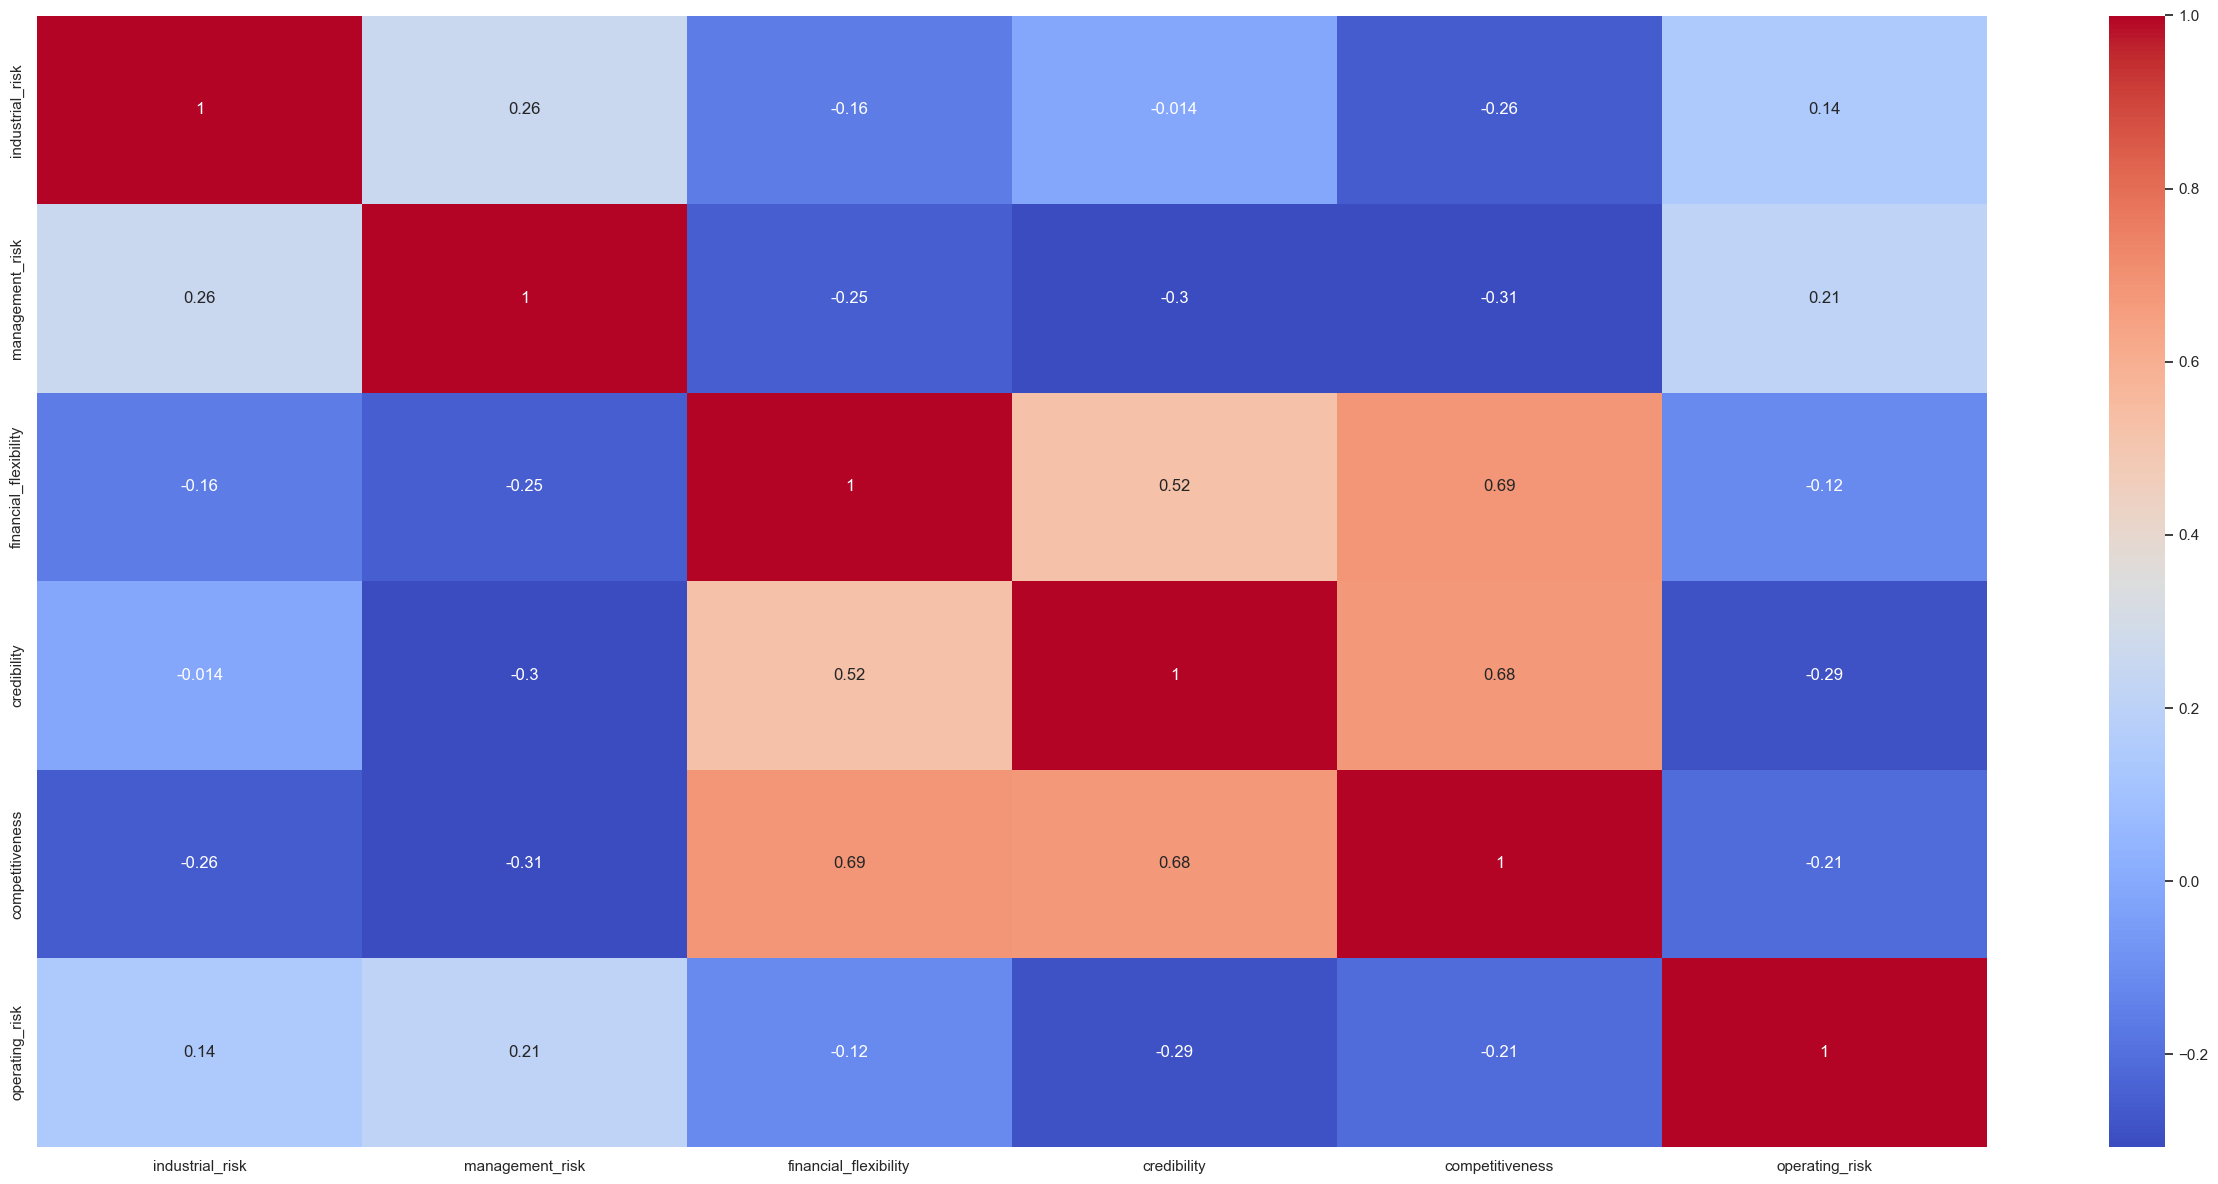

In [15]:
corr_mat = df.corr()
sns.set(style='whitegrid')
plt.figure(figsize=(25,12))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.tight_layout()

        Density Plot

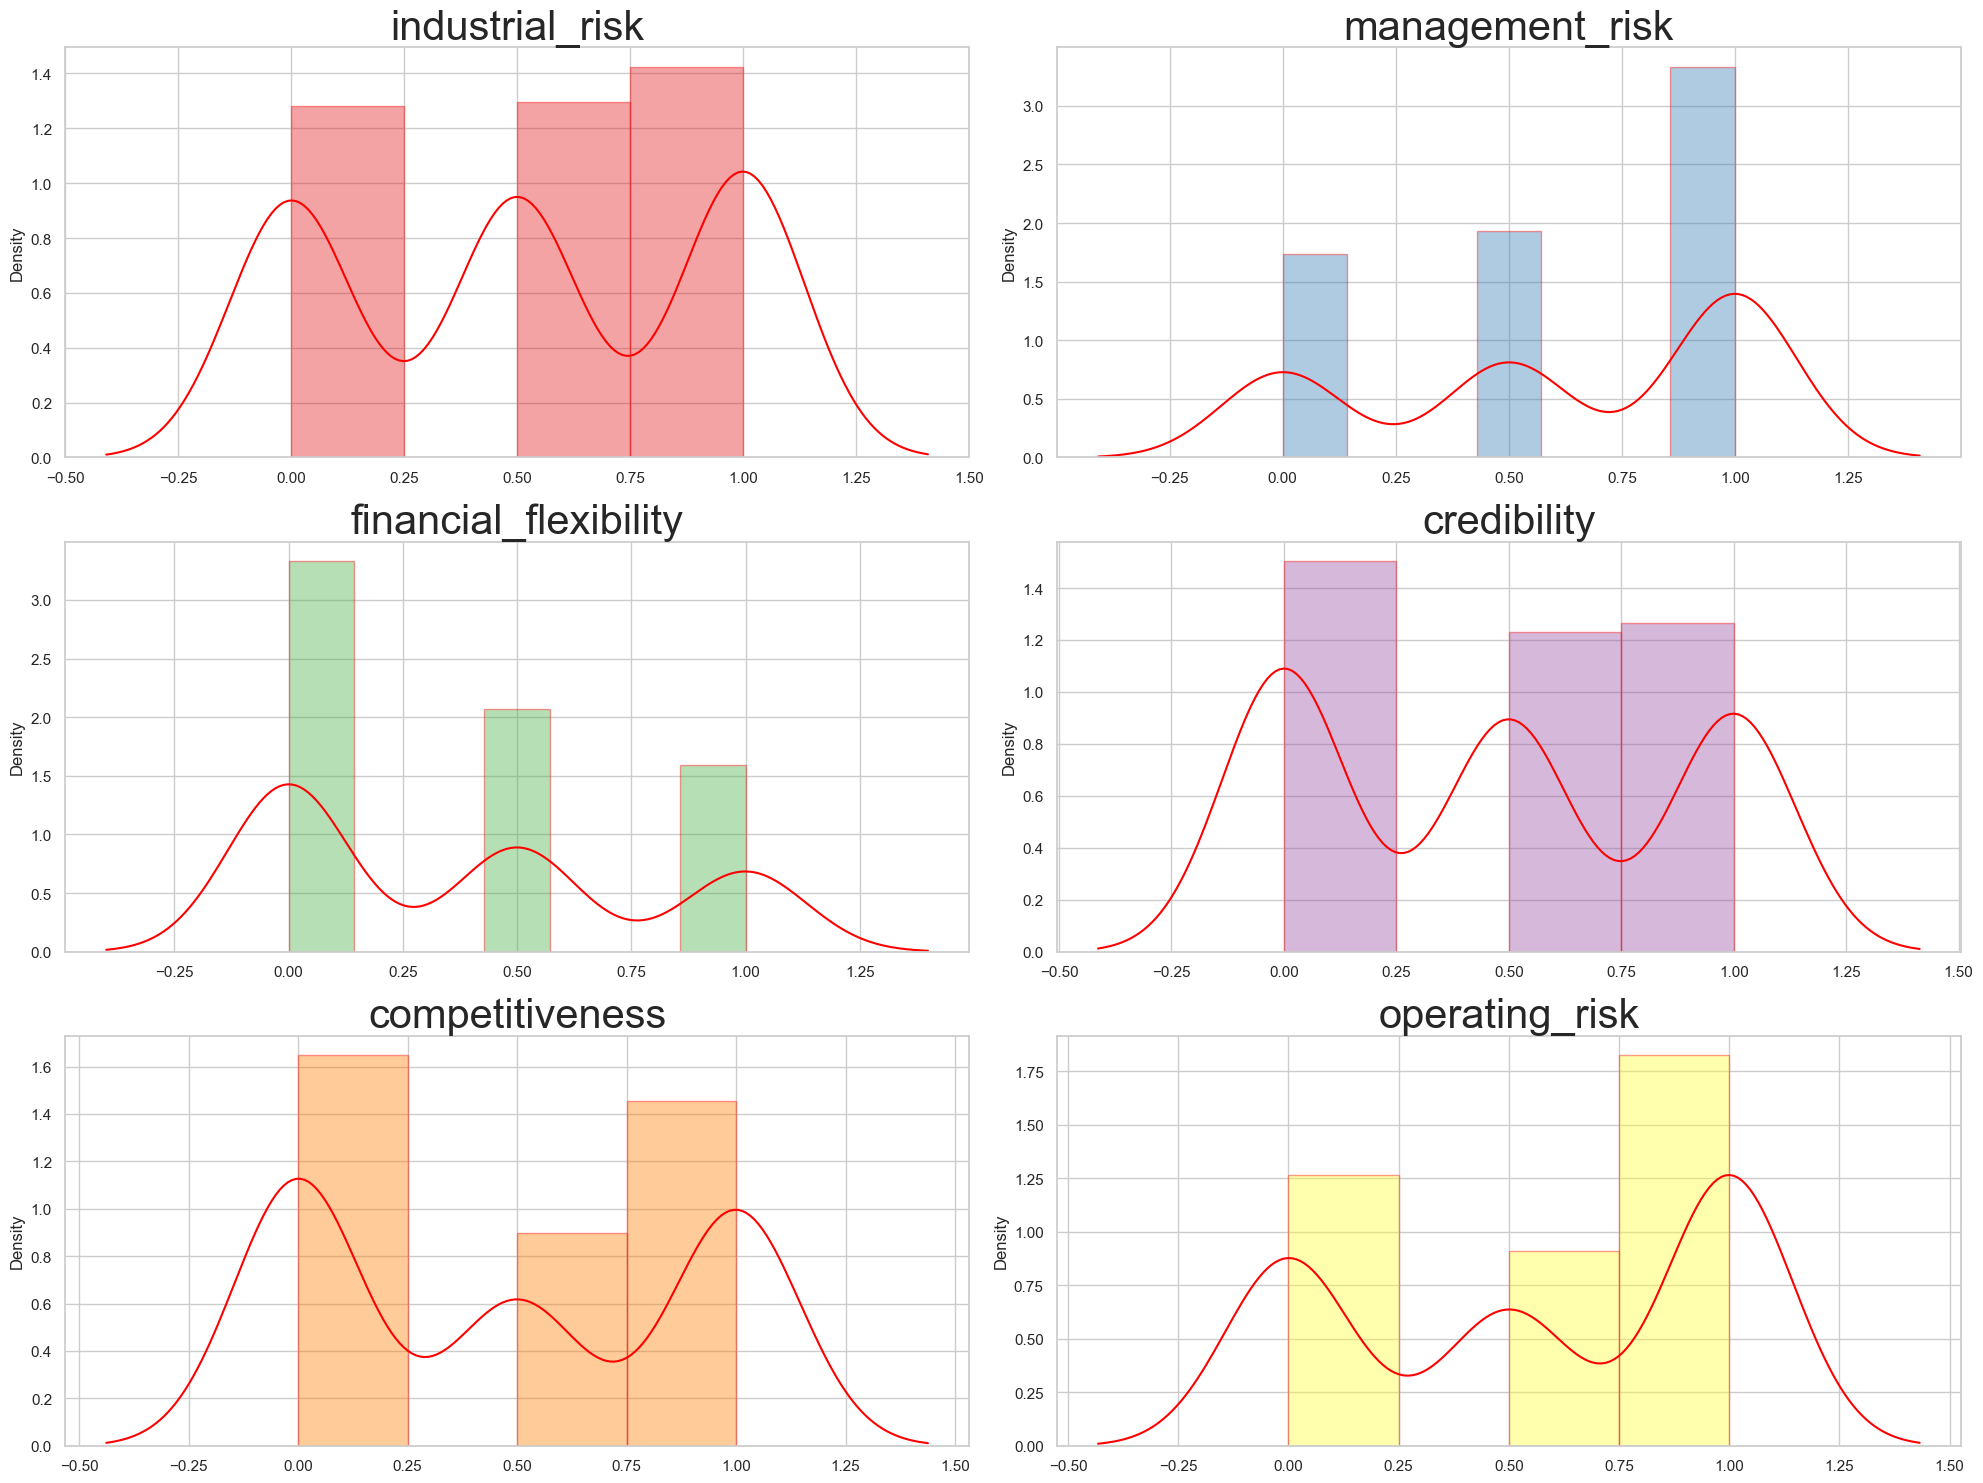

In [18]:
df1 = df[[i for i in df.columns if df[i].dtypes == 'float64' or df[i].dtypes == 'int64']]
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
custom_palette = sns.color_palette("Set1")
axes = axes.flatten()

for i, col in enumerate(df1.columns):
    sns.distplot(x=df1[col], ax=axes[i], color=custom_palette[i], hist_kws={'edgecolor': 'red'}, kde_kws={'color': 'red'})
    axes[i].set_title(col, fontsize=30)

plt.tight_layout()
plt.show()

        Histogram Plot

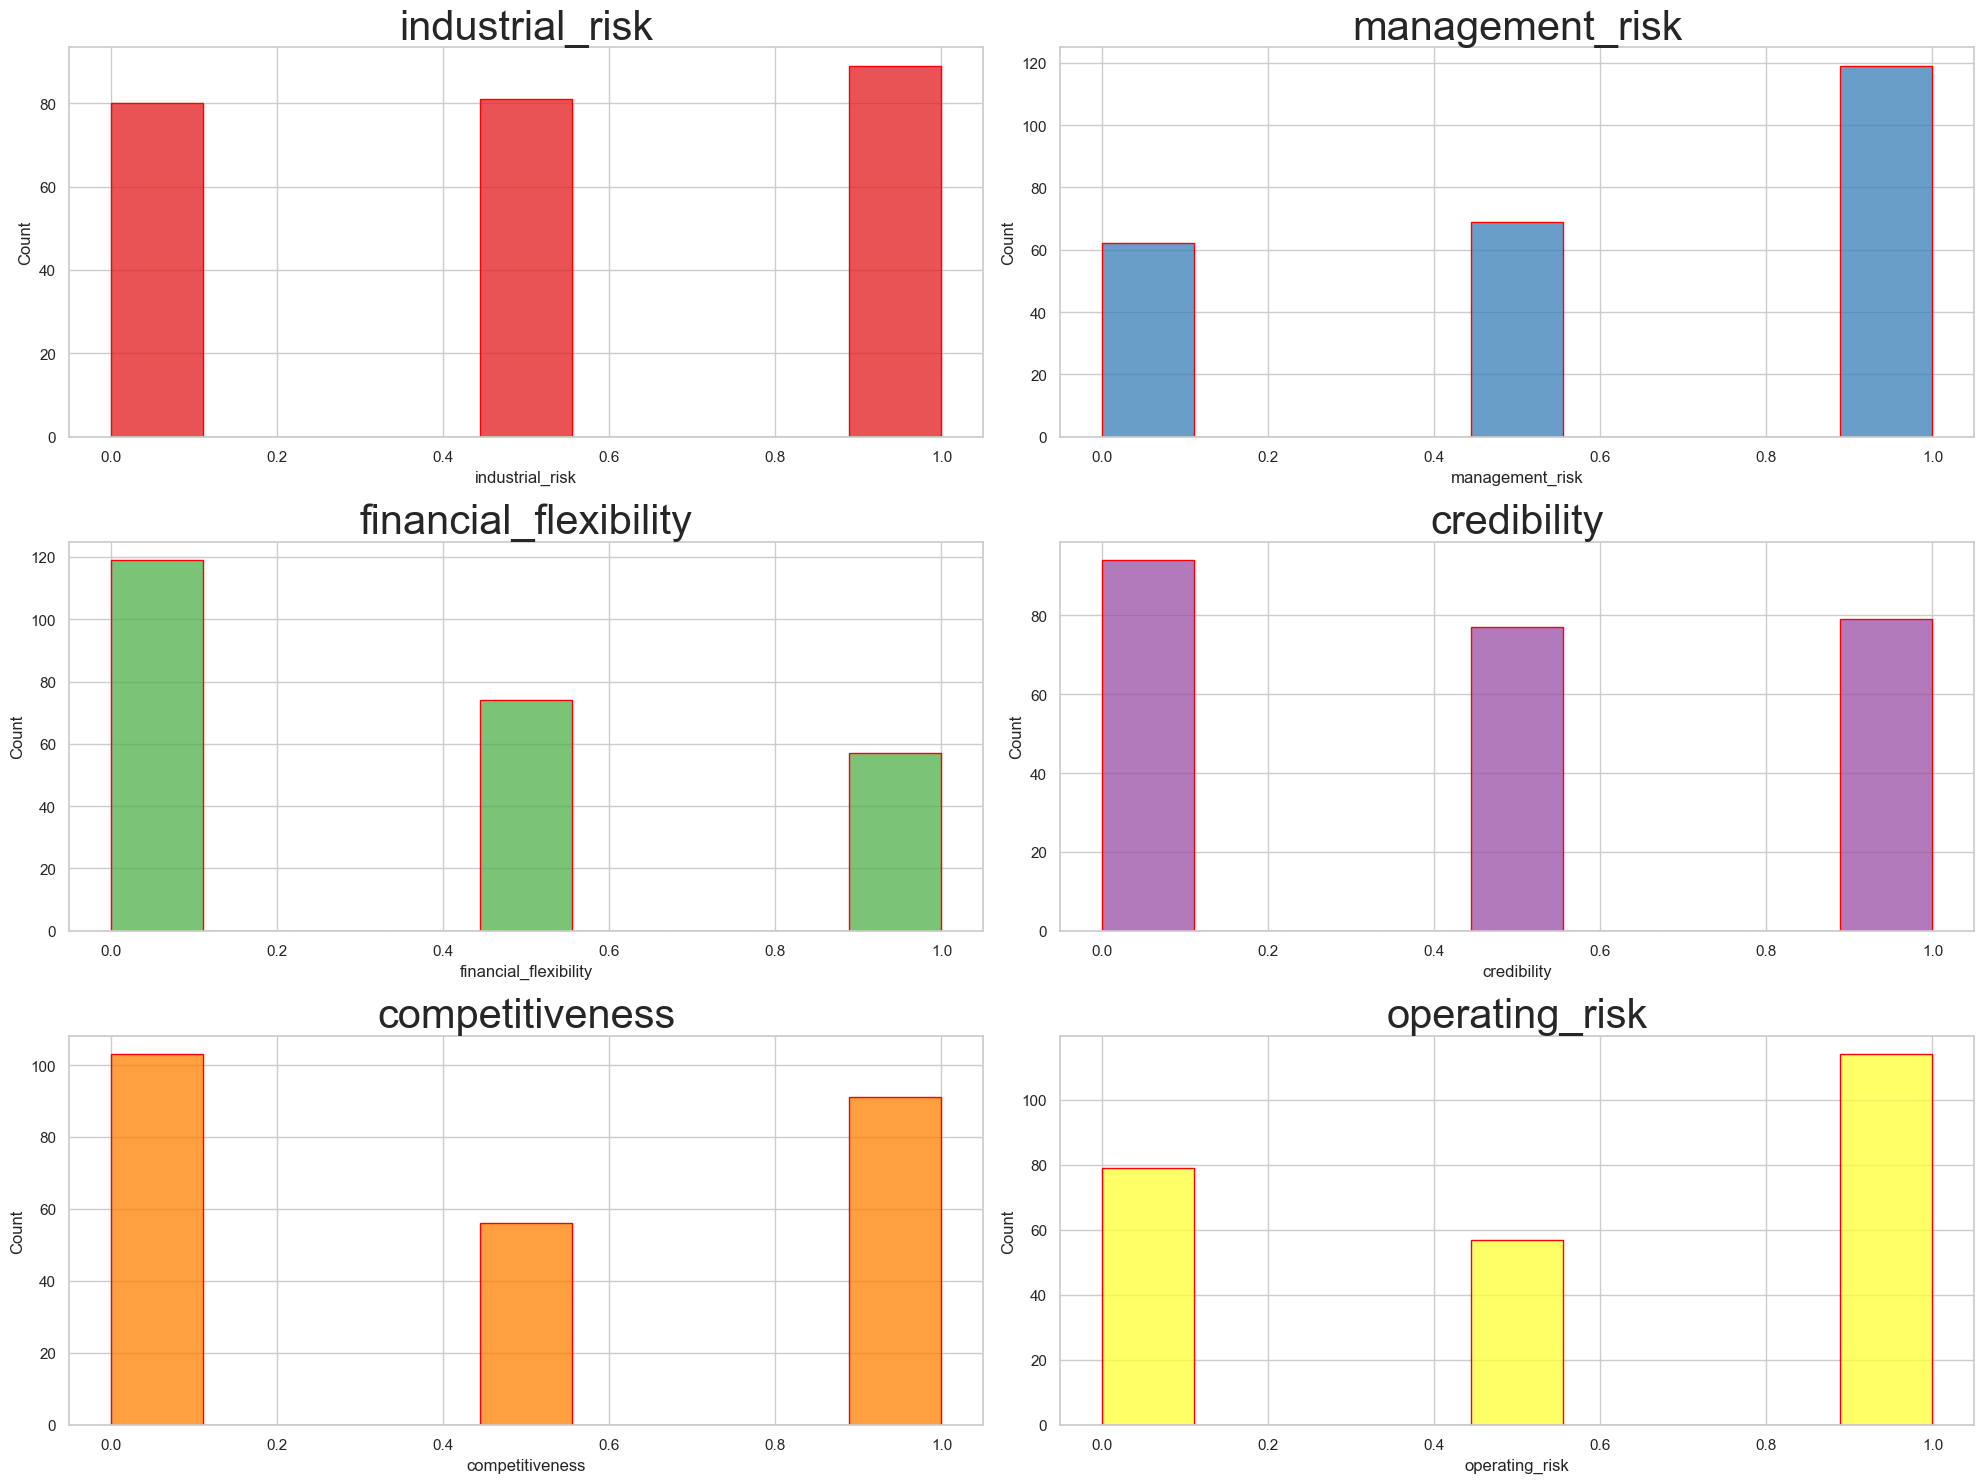

In [19]:
df1 = df[[i for i in df.columns if df[i].dtypes == 'float64' or df[i].dtypes == 'int64']]
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
custom_palette = sns.color_palette("Set1")
axes = axes.flatten()

for i, col in enumerate(df1.columns):
    sns.histplot(x=df1[col], ax=axes[i], color=custom_palette[i],edgecolor='red')
    axes[i].set_title(col, fontsize=30)

plt.tight_layout()
plt.show()


        Frequency Distribution

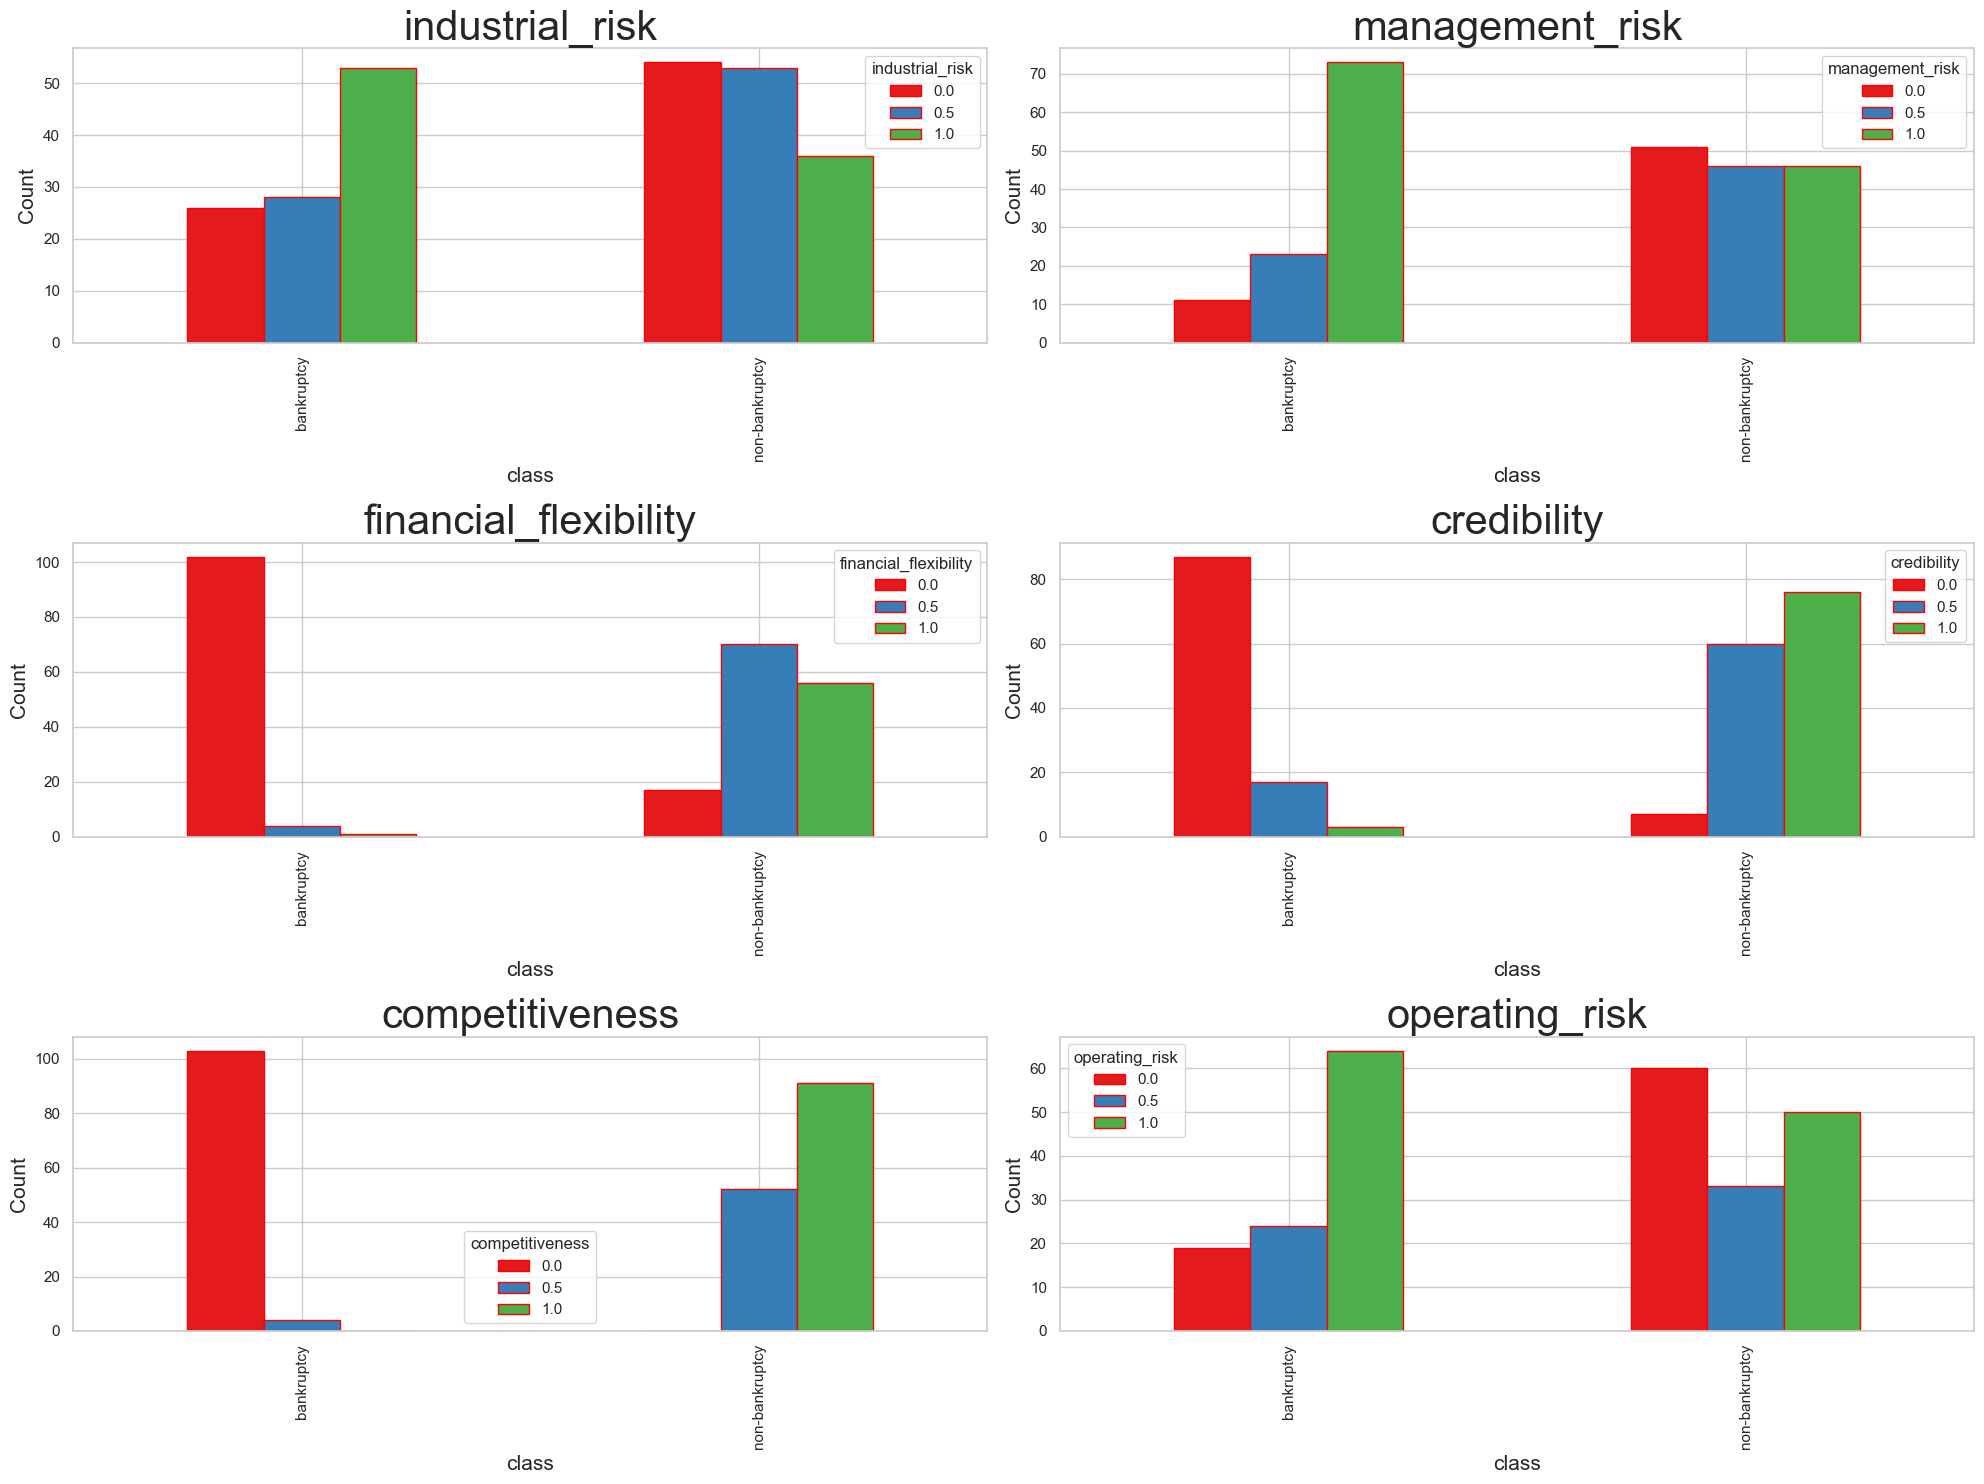

In [20]:
df1 = df[[i for i in df.columns if df[i].dtypes == 'float64' or df[i].dtypes == 'int64']]
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
custom_palette = sns.color_palette("Set1")
axes = axes.flatten()

class_variable = 'class'

for i, col in enumerate(df1.columns):
    colors = [custom_palette[j] for j in range(len(df1[col].unique()))]
    pd.crosstab(df[class_variable], df1[col]).plot(kind='bar', ax=axes[i], color=colors, edgecolor='red')
    # pd.crosstab(df[class_variable], df1[col]).plot(kind='bar', ax=axes[i], color=colors, edgecolor='red',stacked=True)
    axes[i].set_title(col, fontsize=30)
    axes[i].set_xlabel(class_variable, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)
    axes[i].legend(title=col)

plt.tight_layout()
plt.show()

        ScatterPlot

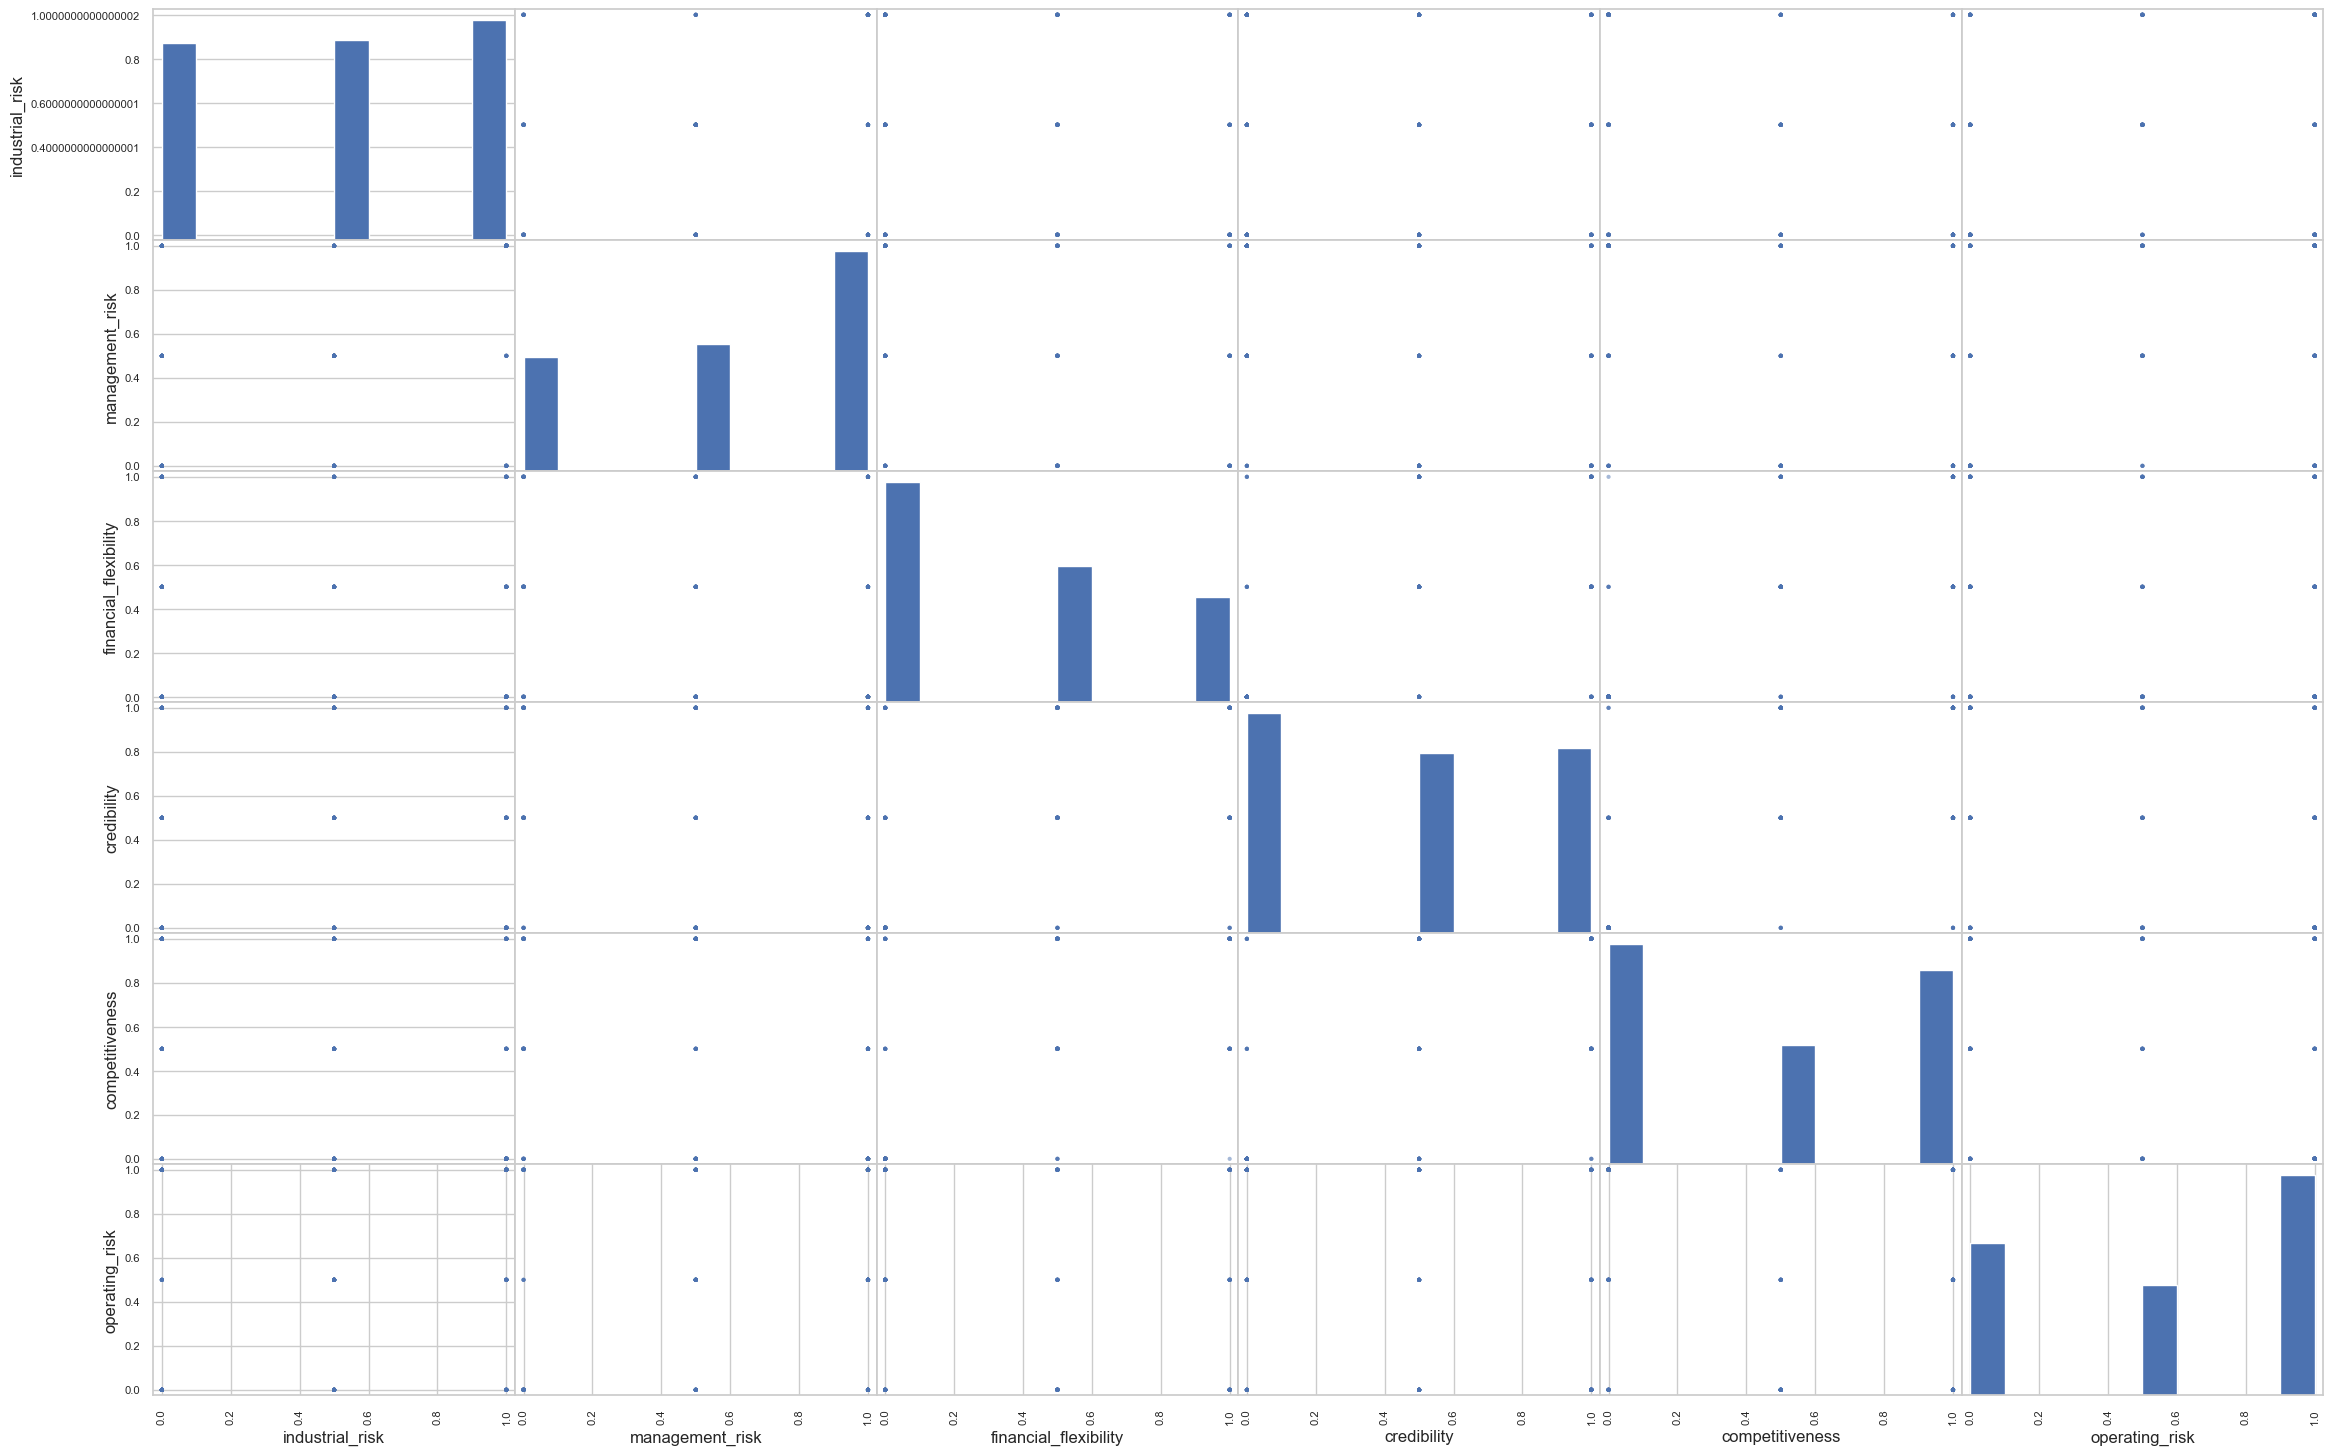

In [21]:
scatter_matrix(df,figsize=(28,18))
plt.show()

## Data Preparation

        Data Cleaning

                Dropping null values, however no null values present in our dataset.


In [22]:
df = df.dropna()

        Dropping duplicate entries

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(103, 7)

In [25]:
df['class'].value_counts()

non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64

        Verifying the existence of duplicate entries

In [26]:
df.duplicated().sum()

0

        Verifying the data types

In [27]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

        Feature Engineering

In [28]:
df1 = df.copy()
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [29]:
df1.shape

(103, 7)

In [30]:
X = df1.drop('class',axis=1)
y = df['class']

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82, 6), (21, 6), (82,), (21,))

## Model Building

            Creating models using various algorithms


In [35]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Voting Classifier', VotingClassifier(estimators=[
        ('Logistic Regression', LogisticRegression()),
        ('Support Vector Machine', SVC()),
        ('KNeighbors Classifier', KNeighborsClassifier()),
        ('Decision Tree Classifier', DecisionTreeClassifier()),
        ('Random Forest Classifier', RandomForestClassifier()),
        ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ])),
    ('Bagging Classifier', BaggingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('MLP Classifier', MLPClassifier()),
    ('Multinomial NB Classifier', MultinomialNB()),
    ('Gaussian NB Classifier', GaussianNB()),
    ('Bernoulli NB Classifier', BernoulliNB())
]


In [38]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [39]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [41]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [43]:
import joblib
joblib.dump(clf, 'bankruptcy_classification_model.pkl')

['bankruptcy_classification_model.pkl']

## Model Evaluation

            Evaluating different models

In [36]:
results = []
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sc = accuracy_score(y_test, y_pred)
    
    # Specify the positive label based on your actual class labels
    precision_sc = precision_score(y_test, y_pred, pos_label=1)
    recall_sc = recall_score(y_test, y_pred, pos_label=1)
    f1_sc = f1_score(y_test, y_pred, pos_label=1)
    roc_auc_sc = roc_auc_score(y_test, y_pred)
    
    results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score', 'ROC-AUC Score'])
print('Model Performance: ')
results_df

Model Performance: 


,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.952381,0.941176,1.0,0.969697,0.9
1,Support Vector Machine,0.952381,0.941176,1.0,0.969697,0.9
2,KNeighbors Classifier,1.000000,1.000000,1.0,1.000000,1.0
3,Decision Tree Classifier,0.952381,0.941176,1.0,0.969697,0.9
4,Random Forest Classifier,0.952381,0.941176,1.0,0.969697,0.9
5,Gradient Boosting Classifier,0.952381,0.941176,1.0,0.969697,0.9
6,Voting Classifier,0.952381,0.941176,1.0,0.969697,0.9
7,Bagging Classifier,0.952381,0.941176,1.0,0.969697,0.9
8,AdaBoost Classifier,0.952381,0.941176,1.0,0.969697,0.9
9,MLP Classifier,0.952381,0.941176,1.0,0.969697,0.9


        Confusion Matrix

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  0]
 [ 0 16]]


## Deployment

    File name: app.py
    To run the code:   write in the terminal as 'streamlit run app.py'

In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load the pre-trained model
model = joblib.load('bankruptcy_classification_model.pkl')


# Function to classify Bankrupt or non-Bankrupt
def bankruptcy_classification(features):
    input_data = pd.DataFrame(features, index=[0])
    prediction = model.predict(input_data)[0]
    return prediction

# Loading the dataset
df = pd.read_csv('bankruptcy-prevention.csv',sep=';')
df.columns = df.columns.str.strip()

# Streamlit UI
st.markdown(
    """
    <div style="font-family: Times New Roman; font-size:50px;">
        Bankruptcy Prevention
    </div>
    """,
    unsafe_allow_html=True
)

# User input form
st.sidebar.header('Enter Details Here: ')
industrial_risk = st.sidebar.slider('Industrial Risk', min_value=float(df['industrial_risk'].min()), max_value=float(df['industrial_risk'].max()), step=0.5)
management_risk = st.sidebar.slider('Management Risk', min_value=float(df['management_risk'].min()), max_value=float(df['management_risk'].max()), step=0.5)
financial_flexibility = st.sidebar.slider('Financial Flexibility', min_value=float(df['financial_flexibility'].min()), max_value=float(df['financial_flexibility'].max()), step=0.5)
credibility = st.sidebar.slider('Credibility', min_value=float(df['credibility'].min()), max_value=float(df['credibility'].max()), step=0.5)
competitiveness = st.sidebar.slider('Competitiveness', min_value=float(df['competitiveness'].min()), max_value=float(df['competitiveness'].max()), step=0.5)
operating_risk = st.sidebar.slider('Operating Risk', min_value=float(df['operating_risk'].min()), max_value=float(df['operating_risk'].max()), step=0.5)

# User input features
user_input = {
    'industrial_risk': industrial_risk,
    'management_risk': management_risk,
    'financial_flexibility': financial_flexibility,
    'credibility': credibility,
    'competitiveness': competitiveness,
    'operating_risk': operating_risk,
}

# Prediction
if st.sidebar.button('Bankruptcy Prevention'):
    prediction = bankruptcy_classification(user_input)
    if prediction == 0:
        prediction="Chances of Bankruptcy"
    else:
        prediction = 'No chances of Bankruptcy'
    st.success(f'Classified as: {prediction}')

# Adding "Developed by Group - 1 (P318)" at the bottom right
st.markdown(
    """
    <div style="position: fixed; bottom: 15px; right: 20px; text-align: left; font-size:15px; font-family: Courier new">
        Developed by <span style="font-family: Times New Roman; font-size:25px; color:#ff4b4b">Group-1 (P318)</span>
    </div>
    """, 
    unsafe_allow_html=True
)